In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("bike_sharing.csv")

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## <font color='purple'>1. Define Problem Statement and perform Exploratory Data Analysis.</font>

### <font color='purple'>Definition of problem (as per given problem statement with additional views)</font>

### Problem Statement

As cities continue to expand, sustainable transportation options like **bike-sharing systems** have become increasingly popular. These systems allow users to rent bicycles for short trips, reducing congestion, pollution, and dependency on private vehicles. 

However, one major challenge faced by bike-sharing companies is **understanding and predicting the demand for bikes**. Demand varies based on multiple factors such as **season, weather conditions, temperature, humidity, working days, holidays, and time of the year**. 

the main goal is to analyze this dataset to:
- Understand **how different factors influence the number of bikes rented**.
- Identify **patterns and trends** in user behavior.
- Provide **data-driven recommendations** to optimize operations, bike availability, and customer satisfaction.

This analysis aims to help management make better business decisions such as:
- **Forecasting demand** for future planning.
- **Improving fleet management** by ensuring bikes are available when and where they’re needed most.
- **Designing marketing strategies** based on customer usage patterns.
- **Enhancing profitability** by aligning resources with customer demand patterns.

By combining exploratory data analysis and statistical insights, this project will deliver a **clear understanding of demand behavior** and guide **strategic business decisions** for improved efficiency and customer experience.


**Objectives**
1. Analyze the key factors that affect bike rental counts.
2. Identify seasonal and temporal trends influencing usage.
3. Understand how weather variables (temperature, humidity, windspeed) impact rentals.
4. Recommend strategies to optimize inventory and operations.



### <font color='purple'>Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.</font>

In [5]:
df.shape

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns are present in the dataset ")

There are 10886 rows and 12 columns are present in the dataset 


In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.7 MB


In [8]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')


In [9]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
df.describe(include = "category")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [11]:
df["datetime"]  = pd.to_datetime(df["datetime"])

In [12]:
df.info(memory_usage = "deep") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [13]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [14]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [15]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [16]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [17]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

### Missing value detection

In [18]:
Missing_value = pd.DataFrame({"missing_value":df.isnull().sum(), "Percentage":((df.isnull().sum())/len(df))*100})
Missing_value 

,missing_value,Percentage
datetime,0,0.0
season,0,0.0
holiday,0,0.0
workingday,0,0.0
weather,0,0.0
temp,0,0.0
atemp,0,0.0
humidity,0,0.0
windspeed,0,0.0
casual,0,0.0


There in no Missing values present in the dataset

### Outliers treatment

**IQR Method**

In [145]:
df_num = df.select_dtypes(include = np.number)

In [146]:
df_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [147]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1

In [148]:
df_iqr = df[~(df_num < (Q1 - (1.5*IQR)))|(df_num > (Q3 + (1.5 * IQR)))]

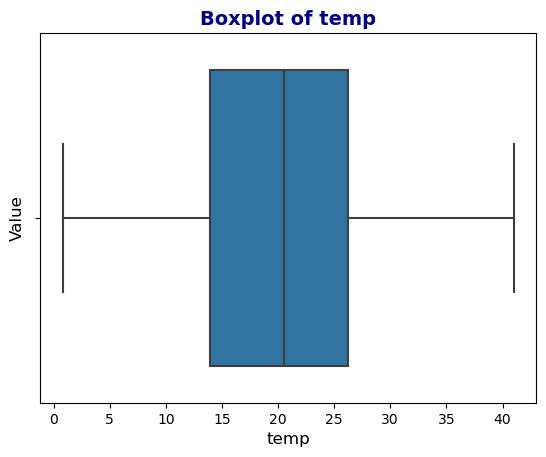

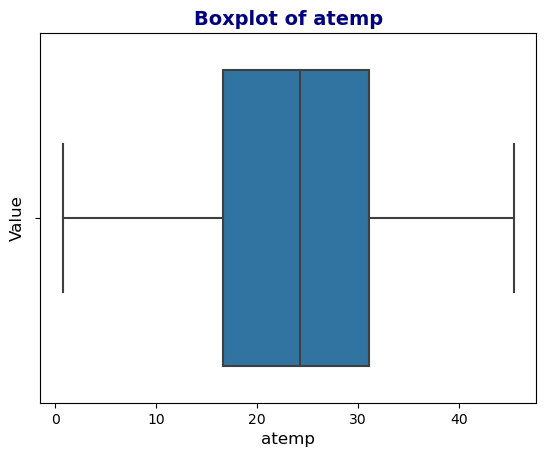

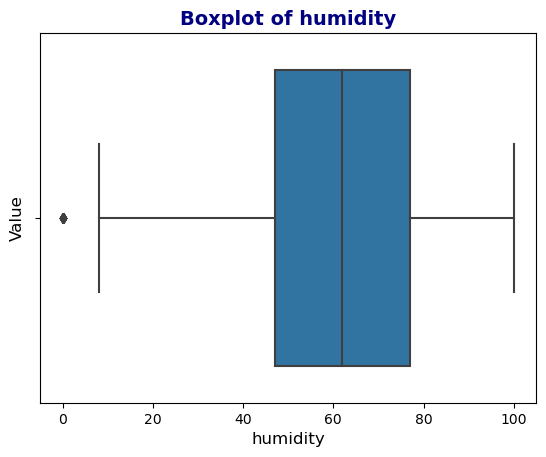

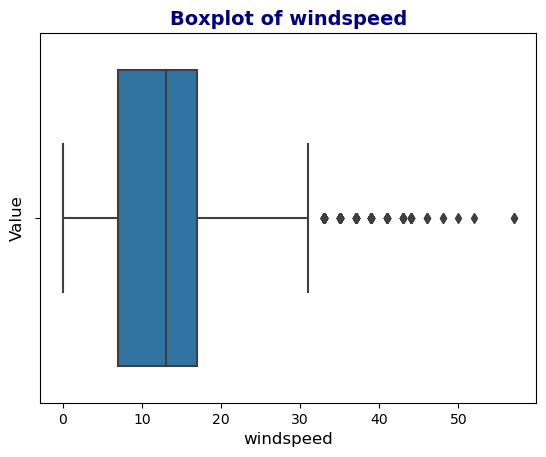

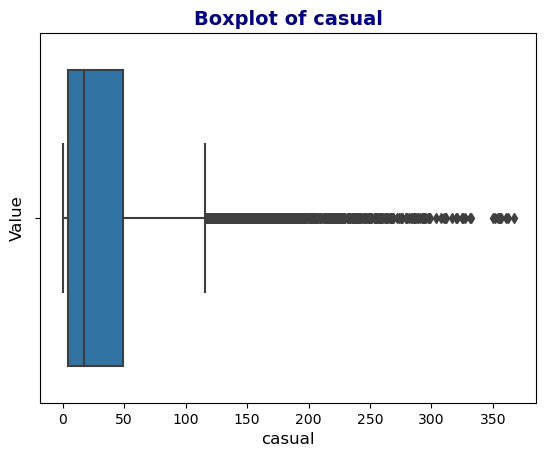

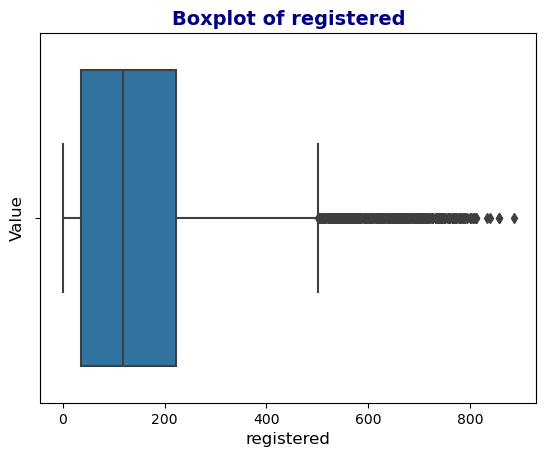

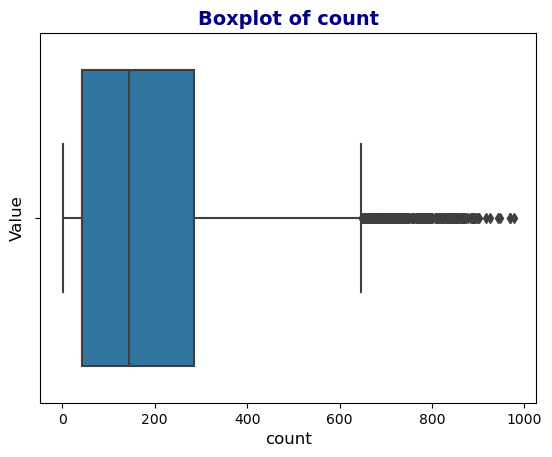

In [149]:
for col in df_num.columns:
    sns.boxplot(x = col, data = df_num, orient='v')
    plt.title(f'Boxplot of {col}', fontsize=14, weight='bold', color='navy')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.show()



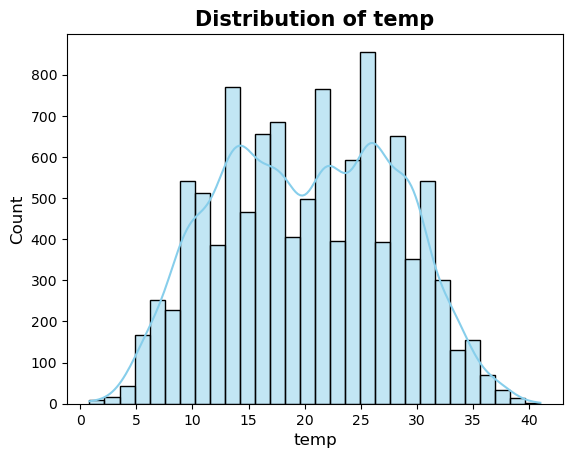

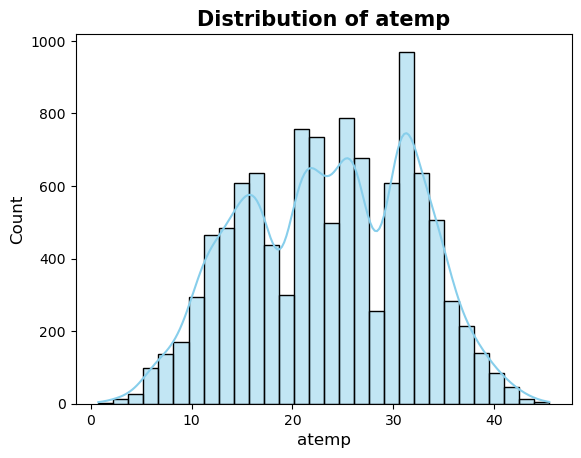

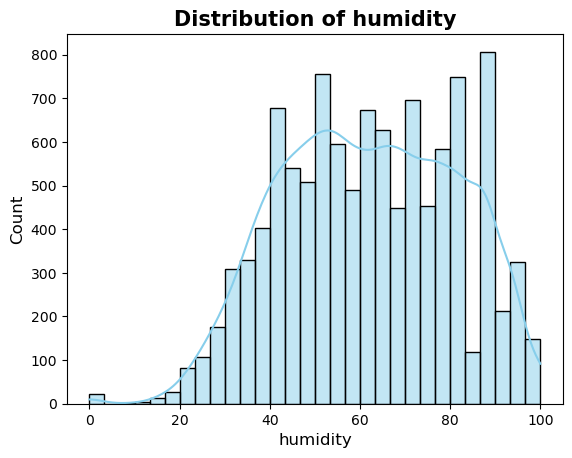

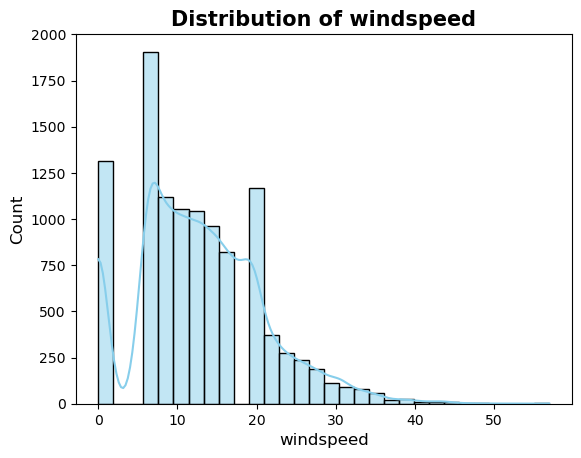

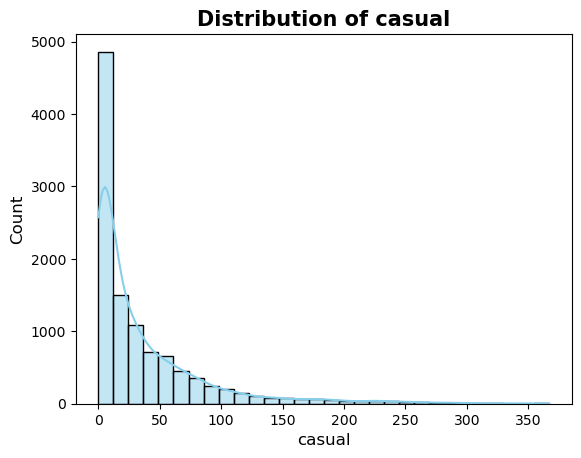

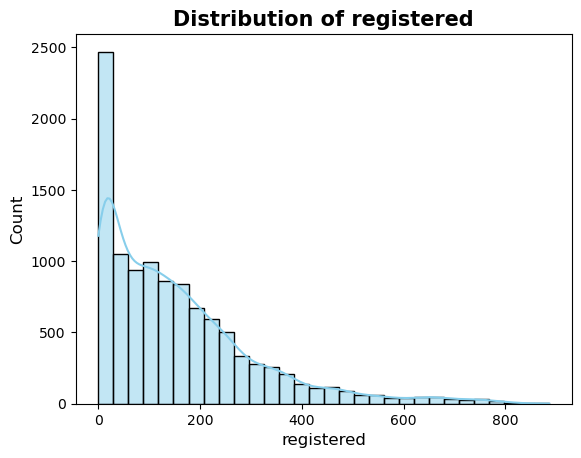

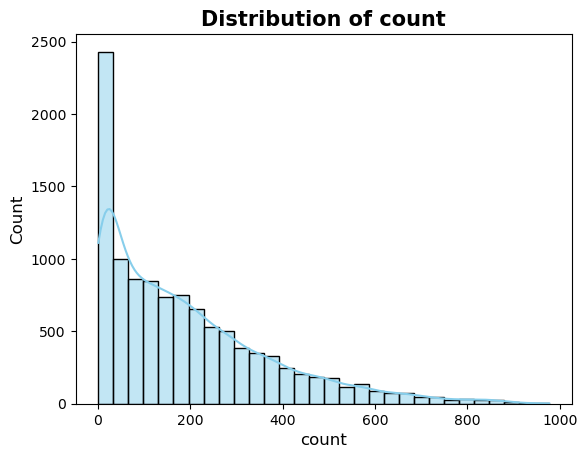

In [150]:
for col in df_num.columns:
    sns.histplot(df[col],  kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=15, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()


**Z Score method**

In [151]:
from scipy.stats import zscore

In [152]:
df.shape

(10886, 12)

In [153]:
df_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

- temp, atemp, humidity:  these variables are almost normally distributed.No much outliers present in these variables.
- windspeed, casual, registered, count: these variables are right skewed distribution, contains outliers, These outliers represent genuine demand peaks, not data errors — so they are retained for business insight.
- we can apply z score method of outlier treatment only for normally distributed variables.

In [154]:
df_norm = df[['temp', 'atemp', 'humidity']]

In [155]:
z_score_threshold = 3

z_score = np.abs(zscore(df_norm))

df_zscore_norm = df[(z_score < z_score_threshold).all(axis = 1)]

In [156]:
df_zscore_norm.shape

(10864, 12)

- zscore method is best when data approximates a **normal Distribution**

### <font color='purple'>Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)</font>



**Numerical variable**

In [157]:
df_num.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

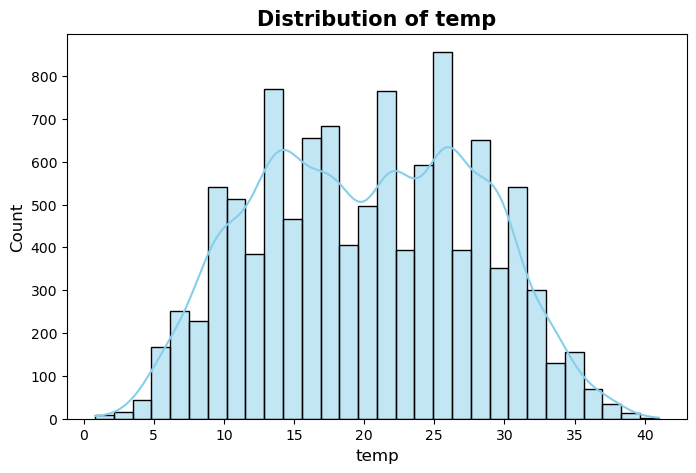

In [158]:
plt.figure(figsize = (8, 5))
sns.histplot(df['temp'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of temp', fontsize=15, weight='bold')
plt.xlabel('temp', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
    


In [159]:
df["temp"].skew()

0.003690844422472008

In [160]:
df["temp"].kurt()

-0.9145302637630794

- temperature data looks quite normal-like, with no major skew and slightly less peakedness than normal — meaning most temperatures are close to the average, and extreme highs/lows are rare.

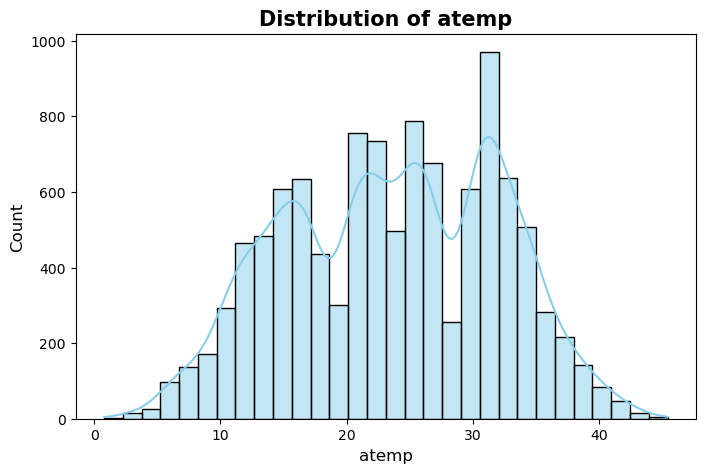

In [161]:
plt.figure(figsize = (8, 5))
sns.histplot(df['atemp'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of atemp', fontsize=15, weight='bold')
plt.xlabel('atemp', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [162]:
df["atemp"].skew()

-0.10255951346908665

In [163]:
df["atemp"].kurt()

-0.8500756471754651

- skewness is -0.102 The skewness is very close to 0, and only slightly negative,This means  apparent temperature data is almost symmetric,with a tiny tendency toward lower temperatures — but nothing significant.
- Kurtosis = -0.8501 The distribution is flatter than a normal curve,meaning there are fewer extreme apparent temperature values (no heavy tails) and most observations are spread evenly around the average.

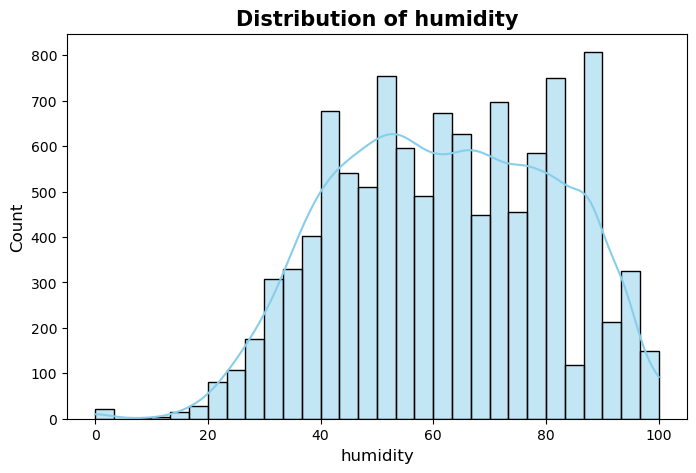

In [164]:
plt.figure(figsize = (8, 5))
sns.histplot(df['humidity'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of humidity', fontsize=15, weight='bold')
plt.xlabel('humidity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [165]:
df["humidity"].skew()

-0.08633518364548581

In [166]:
df["humidity"].kurt()

-0.7598175375208864

- The skewness is -0.0863, which is very close to 0. This means humidity values are almost perfectly symmetric, there’s no noticeable lean toward very low or very high humidity.
- The kurtosis is -0.7598, which means the humidity distribution is flatter than normal. There are fewer extreme humidity levels, and most values are moderately distributed around the mean.

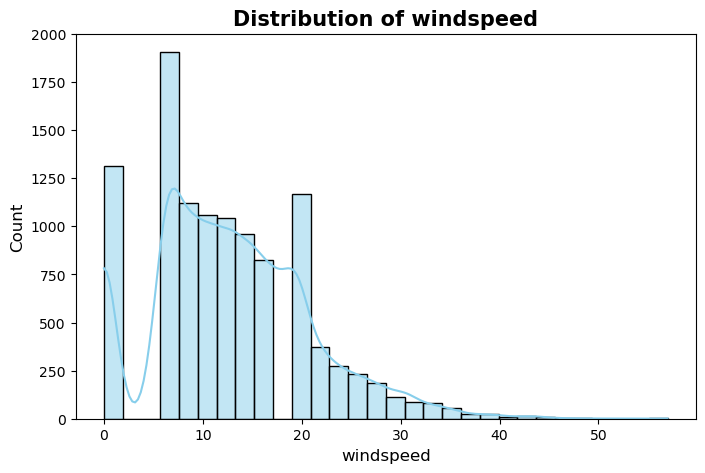

In [167]:
plt.figure(figsize = (8, 5))
sns.histplot(df['windspeed'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of windspeed', fontsize=15, weight='bold')
plt.xlabel('windspeed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [168]:
df["windspeed"].skew()

0.5887665265853944

In [169]:
df["windspeed"].kurt()

0.6301328693364932

- The skewness is 0.5888, which is moderately positive. This means the wind speed distribution is right-skewed most wind speeds are on the lower side, but there are a few instances of high wind speeds (long right tail).
- The kurtosis is 0.63, which is slightly positive.That means the wind speed distribution is a bit more peaked than normal suggesting some extreme wind events (both very low and very high) occur more often than in a perfectly normal distribution.

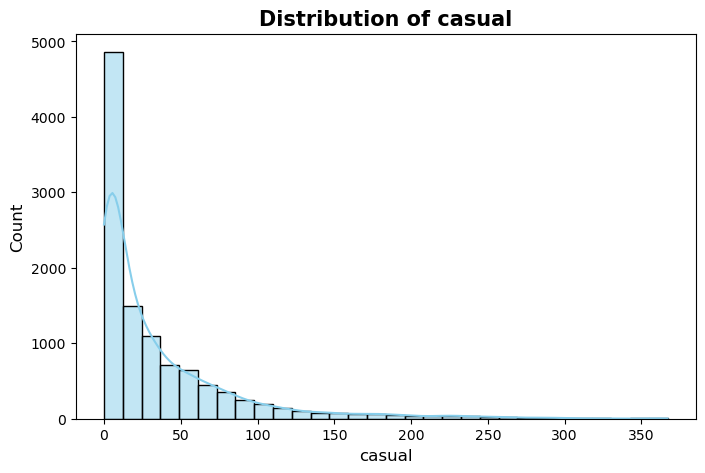

In [170]:
plt.figure(figsize = (8, 5))
sns.histplot(df['casual'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of casual', fontsize=15, weight='bold')
plt.xlabel('casual', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [171]:
df["casual"].skew()

2.4957483979812567

In [172]:
df["casual"].kurt()

7.551629305632764

- The skewness is strongly positive (≈ 2.5) The distribution is highly right-skewed. Most of the values are low (few casual riders on many days), but there are some days with very high casual counts likely weekends or holidays when casual ridership spikes.
- The kurtosis of 7.55 is very high, meaning the data is extremely peaked and heavy-tailed. There are many extreme values — days with unusually high casual ridership far from the mean.

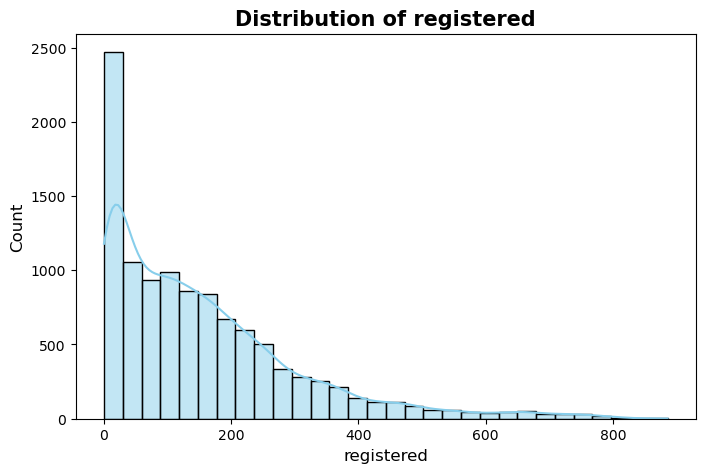

In [173]:
plt.figure(figsize = (8, 5))
sns.histplot(df['registered'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of registered', fontsize=15, weight='bold')
plt.xlabel('registered', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [174]:
df["registered"].skew()

1.5248045868182296

In [175]:
df["registered"].kurt()

2.6260809999210672

- The skewness of 1.52 means the distribution is moderately to strongly right-skewed.This tells us that most days have moderate registered user counts,but some days show very high registrations — possibly due to better weather, weekdays, or special events.
- The kurtosis of 2.63 indicates that the data is more peaked than normal, meaning there are some extreme values (days with unusually high registered user counts). It shows a concentration of most values around the mean with some significant outliers.

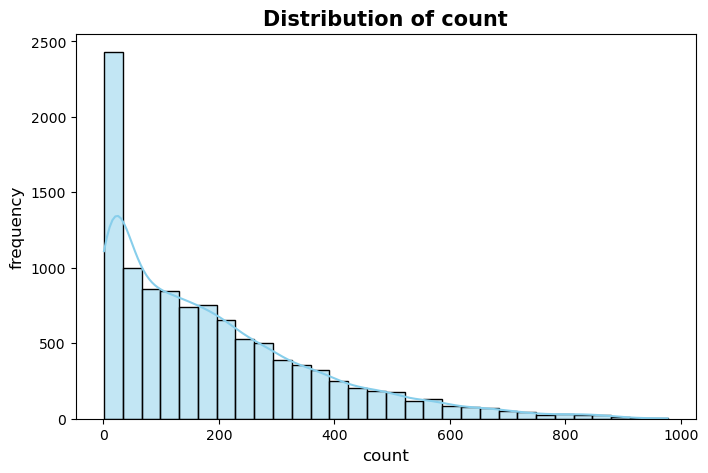

In [176]:
plt.figure(figsize = (8, 5))
sns.histplot(df['count'],  kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of count', fontsize=15, weight='bold')
plt.xlabel('count', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

In [177]:
df["count"].skew()

1.2420662117180776

In [178]:
df["count"].kurt()

1.3000929518398334

- The skewness is 1.24, which means the distribution is positively (right) skewed. Most days have lower or moderate total user counts,but some days show very high total usage — likely weekends, holidays, or peak-season days.
- The kurtosis is 1.3, which means the distribution is slightly more peaked than normal.This suggests that most values are concentrated around the average, but there are also a few extreme high values (heavy tails).

### Sampling Distribution of count

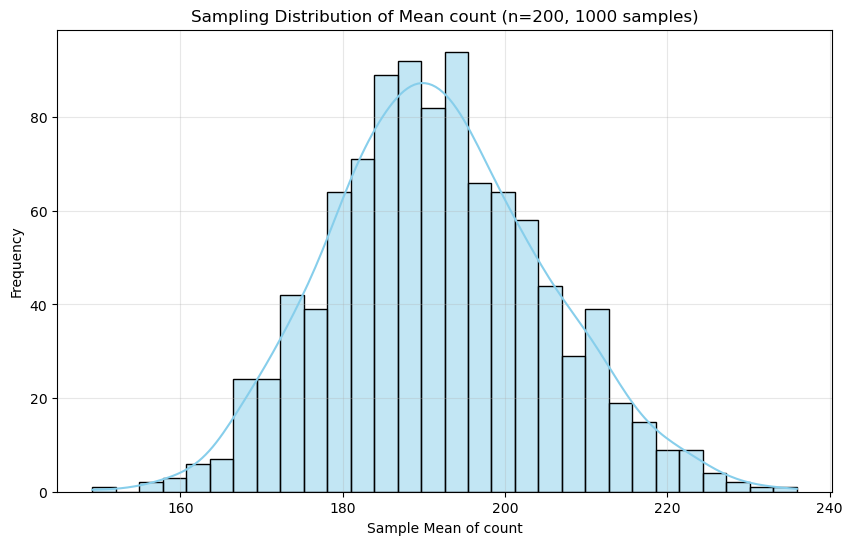

In [179]:
sample_size = 200      # n = 4000 per sample
num_samples = 1000     # number of samples to draw

sample_means = []

for i in range(num_samples):
    sample = np.random.choice(df['count'], size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

plt.figure(figsize=(10,6))
sns.histplot(sample_means, kde=True, color='skyblue', bins=30)
plt.title("Sampling Distribution of Mean count (n=200, 1000 samples)")
plt.xlabel("Sample Mean of count")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


In [180]:
df["count"].mean()

191.57413191254824

In [181]:
np.mean(sample_means)

191.60219

**Categorical variable**

In [182]:
df.select_dtypes(include = "category").columns

Index(['season', 'holiday', 'workingday', 'weather'], dtype='object')

**Season**

In [240]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

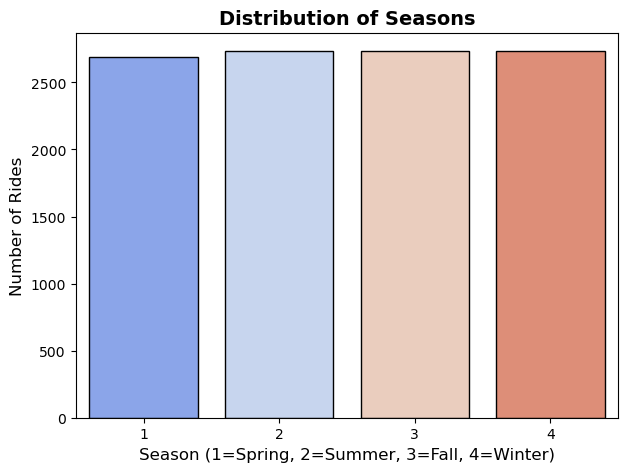

In [183]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="season", palette="coolwarm", edgecolor="black")
plt.xlabel("Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Seasons", fontsize=14, weight='bold')
plt.show()



- the number of records is almost perfectly uniform across all four seasons (Spring, Summer, Fall, Winter), indicating a balanced dataset over the year.

**Holiday**

In [241]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

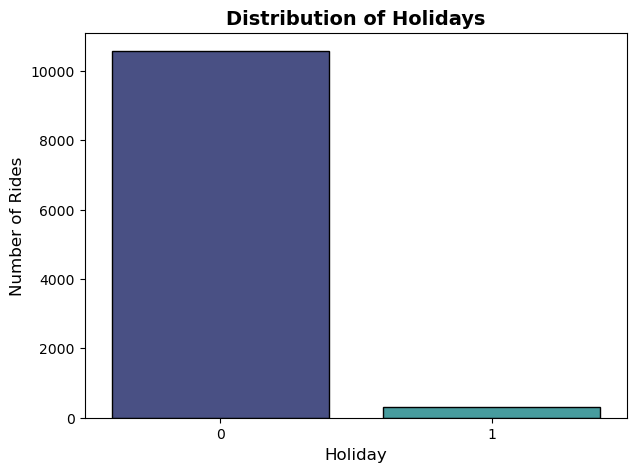

In [184]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="holiday", palette="mako", edgecolor="black")
plt.xlabel("Holiday", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Holidays", fontsize=14, weight='bold')
plt.show()

**Working day**

In [242]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

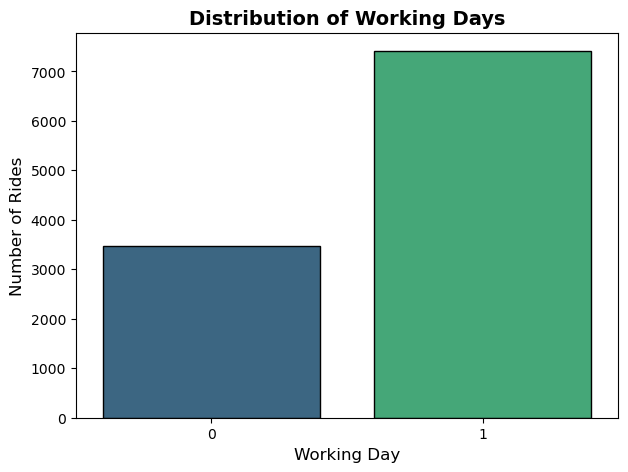

In [185]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="workingday", palette="viridis", edgecolor="black")
plt.xlabel("Working Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Working Days", fontsize=14, weight='bold')
plt.show()

**Weather**

In [243]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

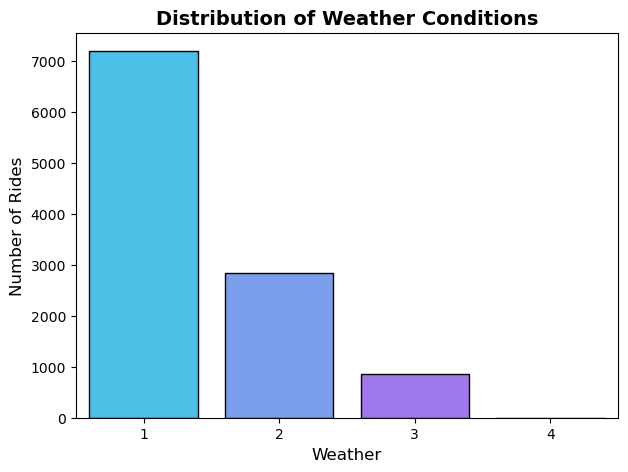

In [186]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="weather", palette="cool", edgecolor="black")
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Distribution of Weather Conditions", fontsize=14, weight='bold')
plt.show()


### <font color='purple'>Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.</font>




In [187]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**season vs Count**

- Null Hypothesis (H₀):	There is no significant difference in average bike rentals (count) across the four seasons.
- Alternative Hypothesis (H₁): There is at least one season where the average bike rentals (count) is significantly different.

In [188]:
spring = df[df["season"] == 1]['count']
summer = df[df["season"] == 2]['count']
fall = df[df["season"] == 3]['count']
winter = df[df["season"] == 4]['count']

In [189]:
# Null Hypothesis (H₀): Variance are equal
# Alternative Hypothesis (H₁): variance are not equal

from scipy.stats import levene

stats, p_value = levene(spring, summer, fall, winter)
stats, p_value

if p_value < 0.05:
    print("variance are not equal")
else:
    print("Variance are equal")

variance are not equal


- sampling distribution of the mean is normal,but variances are unequal So the best choice is **Welch’s ANOVA**

In [190]:
import pingouin as pg

welch_anova = pg.welch_anova(dv='count', between='season', data=df)
print(welch_anova)


   Source  ddof1        ddof2          F          p-unc       np2
0  season      3  5945.553571  335.08888  4.844999e-201  0.061317


 Metric     | Meaning                                                          | Value             |
 ---------- | ---------------------------------------------------------------- | ----------------- |
| **Source** | The categorical variable tested                                  | `season`          |
| **ddof1**  | Between-group degrees of freedom                                 | 3                 |
| **ddof2**  | Within-group degrees of freedom (adjusted for unequal variances) | 5945.55           |
| **F**      | Test statistic                                                   | **335.09**        |
| **p-unc**  | p-value                                                          | **4.84 × 10⁻²⁰¹** |
| **np2**    | Partial eta squared (effect size)                                | **0.0613**        |


In [191]:
p_value = welch_anova['p-unc'][0]
print("P-value:", p_value)

P-value: 4.844999392900512e-201


In [192]:
if p_value < 0.05:
    print("There is at least one season where the average bike rentals (count) is significantly different.")
else:
    print("There is no significant difference in average bike rentals (count) across the four seasons.")

There is at least one season where the average bike rentals (count) is significantly different.


**Effect Size (η² = 0.0613):**

- This indicates a moderate effect size.

- In business terms, season accounts for around 6% of the total variation in bike rentals.

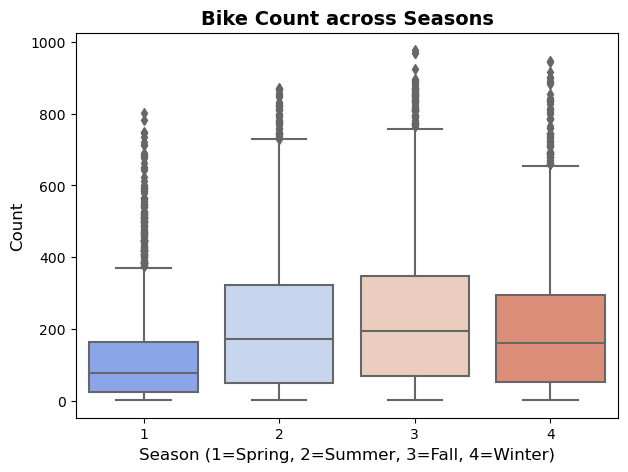

In [193]:
plt.figure(figsize=(7,5))
sns.boxplot(x='season', y='count', data=df, palette='coolwarm')
plt.title('Bike Count across Seasons', fontsize=14, weight='bold')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**The box plot shows the distribution of bike rental counts across the four seasons:**

- Fall (3) and Summer (2) show the highest median rental counts and the widest range of rentals, indicating they are the most popular seasons.

- Spring (1) has the lowest median and the lowest overall rental numbers.

- Winter (4) has a moderate median, higher than Spring but lower than Summer/Fall.

**Holiday vs Count**

- Null Hypothesis (H₀):	There is no significant difference in average bike rentals (count) between holidays and non-holidays.
- Alternative Hypothesis (H₁): There is a significant difference in average bike rentals between holidays and non-holidays.

In [194]:
holiday = df[df["holiday"] == 1]["count"]
non_holiday = df[df["holiday"] == 0]["count"]

In [195]:
# Null Hypothesis (H₀): Variance are equal
# Alternative Hypothesis (H₁): variance are not equal

from scipy.stats import levene

stats, p_value = levene(non_holiday, holiday)
stats, p_value

if p_value < 0.05:
    print("variance are not equal")
else:
    print("Variance are equal")

Variance are equal


- sampling distribution of the mean is normal and variances are equal , Each observation is independent, So the best choice is **ttest_int**

In [196]:
from scipy.stats import ttest_ind

In [197]:
df.groupby("holiday")["count"].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

In [198]:
t, p = ttest_ind(non_holiday, holiday, alternative = "two-sided")
t, p

(0.5626388963477119, 0.5736923883271103)

In [199]:
if p < 0.05:
    print("There is a significant difference in average bike rentals between holidays and non-holidays.")
else:
    print("There is no significant difference in average bike rentals (count) between holidays and non-holidays.")

There is no significant difference in average bike rentals (count) between holidays and non-holidays.


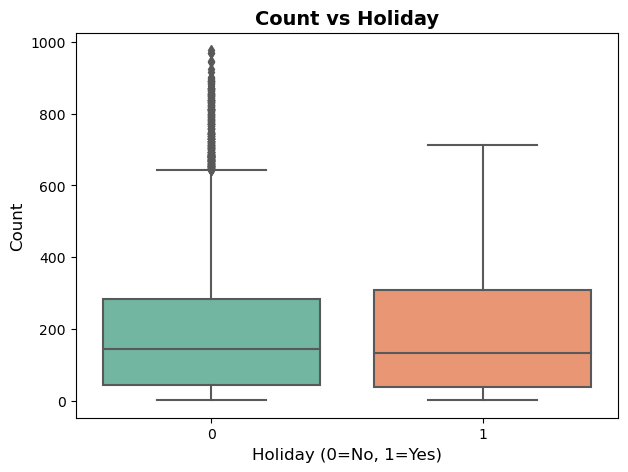

In [200]:
plt.figure(figsize=(7,5))
sns.boxplot(x='holiday', y='count', data=df, palette='Set2')
plt.title('Count vs Holiday', fontsize=14, weight='bold')
plt.xlabel('Holiday (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Workingday vs Count**

- Null Hypothesis (H₀):There is no significant difference in average bike rentals (count) between working days and non-working days..
- Alternative Hypothesis (H₁): There is a significant difference in average bike rentals between working days and non-working days. 

In [201]:
working = df[df["workingday"] == 1]["count"]
non_working = df[df["workingday"] == 0]["count"]

In [202]:
# Null Hypothesis (H₀): Variance are equal
# Alternative Hypothesis (H₁): variance are not equal

from scipy.stats import levene

stats, p_value = levene(working, non_working)
stats, p_value

if p_value < 0.05:
    print("variance are not equal")
else:
    print("Variance are equal")

Variance are equal


- sampling distribution of the mean is normal and variances are equal , Each observation is independent, So the best choice is **ttest_int**

In [203]:
df.groupby("workingday")["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [204]:
t, p = ttest_ind(working, non_working, alternative = "two-sided")
t, p

(1.2096277376026694, 0.22644804226361348)

In [205]:
if p< 0.05:
    print("Bike rentals are significantly different between working and non-working days.")
else:
    print("No significant difference in bike rentals between working and non-working days.")

No significant difference in bike rentals between working and non-working days.


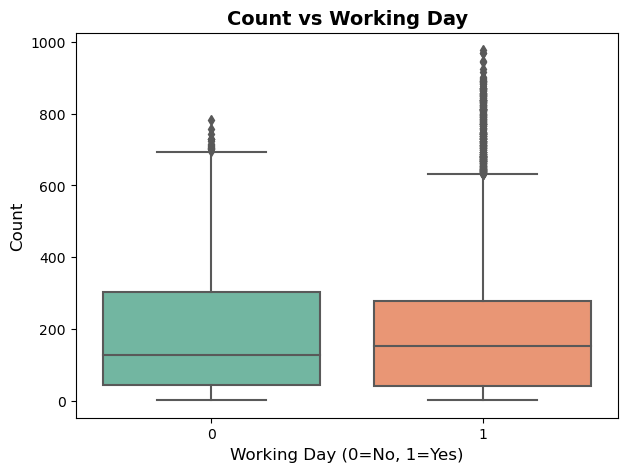

In [206]:
plt.figure(figsize=(7,5))
sns.boxplot(x='workingday', y='count', data=df, palette='Set2')
plt.title('Count vs Working Day', fontsize=14, weight='bold')
plt.xlabel('Working Day (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Weather vs Count**

- Null Hypothesis (H₀):There is no significant difference in average bike rentals (count) across different weather conditions.
- Alternative Hypothesis (H₁): There is at least one weather condition where the average bike rentals (count) are significantly different.

In [207]:
clear = df[df["weather"] == 1]["count"]
Mist = df[df["weather"] == 1]["count"]
Light_rain = df[df["weather"] == 1]["count"]
Heavy_rain = df[df["weather"] == 1]["count"]

In [208]:
# Null Hypothesis (H₀): Variance are equal
# Alternative Hypothesis (H₁): variance are not equal

from scipy.stats import levene

stats, p_value = levene(clear, Mist, Light_rain, Heavy_rain)
stats, p_value

if p_value < 0.05:
    print("variance are not equal")
else:
    print("Variance are equal")

Variance are equal


- sampling distribution of the mean is normal,but variances are unequal So the best choice is **Welch’s ANOVA**

In [209]:
import pingouin as pg

welch_anova = pg.welch_anova(dv='count', between='weather', data=df)
print(welch_anova)


    Source  ddof1        ddof2          F         p-unc       np2
0  weather      3  4592.287221  93.932071  5.349498e-59  0.017745


In [210]:
p_value = welch_anova['p-unc'][0]
print("P-value:", p_value)

P-value: 5.34949847782091e-59


In [211]:
if p_value < 0.05:
    print("There is at least one weather condition where the average bike rentals (count) are significantly different.")
else:
    print("There is no significant difference in average bike rentals (count) across different weather conditions")

There is at least one weather condition where the average bike rentals (count) are significantly different.


**np2 (partial eta squared) = 0.0177 → Effect size.**

This is a small effect, 1.77% of variance in bike counts is explained by weather

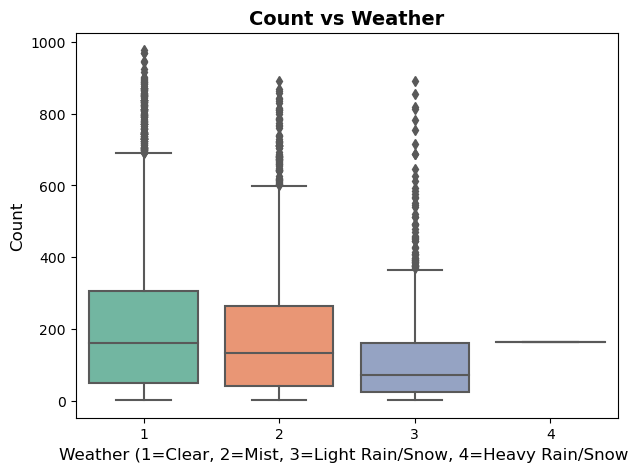

In [212]:
plt.figure(figsize=(7,5))
sns.boxplot(x='weather', y='count', data=df, palette='Set2')
plt.title('Count vs Weather', fontsize=14, weight='bold')
plt.xlabel('Weather (1=Clear, 2=Mist, 3=Light Rain/Snow, 4=Heavy Rain/Snow)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

- Clear/Few Clouds (Weather 1 - Purple/Blue): This condition accounts for the vast majority of high-count days, with many data points clustered along the upper range of counts.

- Mist/Cloudy (Weather 2 - Green/Yellow): This is the next most common, with counts still high, but generally less frequent at the very peak counts compared to Weather 1.

- Light Snow/Rain (Weather 3 - Red/Orange): Days with this weather condition have noticeably lower rental counts, with the highest points not reaching the maximums seen in better weather, demonstrating the negative impact of poor weather on bike usage.

- Heavy Rain/Ice (Weather 4): This condition is rarely observed in the dataset (only one or two data points), which makes sense as the system would likely not be operational or usage would be extremely low.

**Temp vs Count**

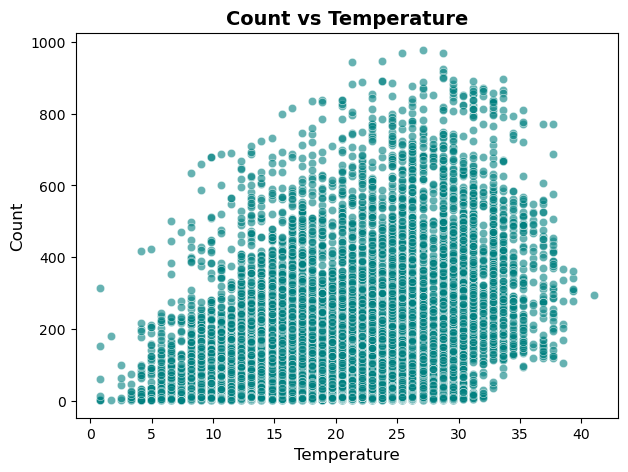

In [213]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='temp', y='count', data=df, color='teal', alpha=0.6)
plt.title('Count vs Temperature', fontsize=14, weight='bold')
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

- Temperature (temp): As temperature increases (moving right on the x-axis), the rental count generally increases, confirming the positive correlation. The highest counts are observed in the $20-35^\circ \text{C}$ range.

**Atemp vs Count**

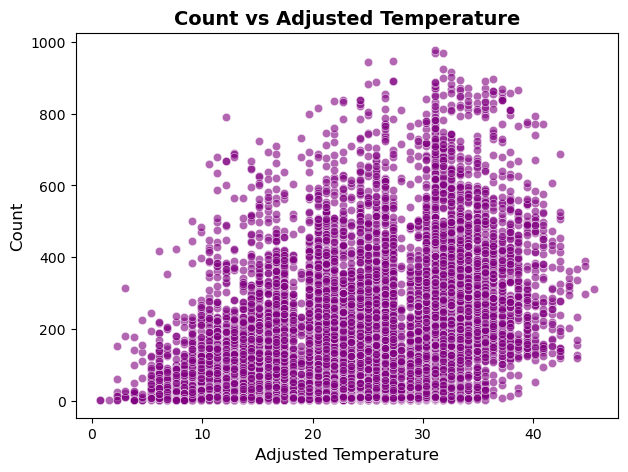

In [214]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='atemp', y='count', data=df, color='purple', alpha=0.6)
plt.title('Count vs Adjusted Temperature', fontsize=14, weight='bold')
plt.xlabel('Adjusted Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Humidity vs Count**

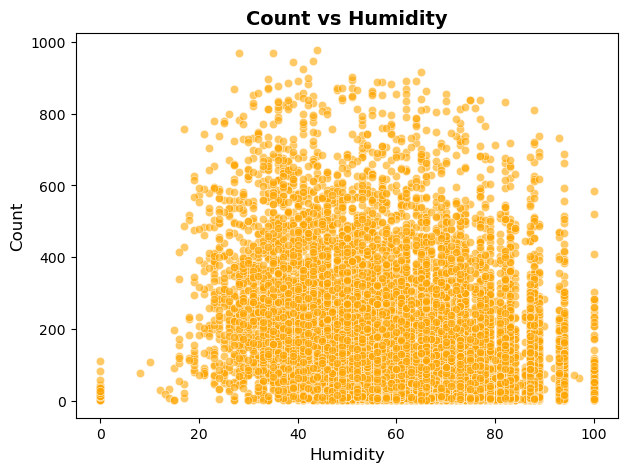

In [215]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='humidity', y='count', data=df, color='orange', alpha=0.6)
plt.title('Count vs Humidity', fontsize=14, weight='bold')
plt.xlabel('Humidity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**Windspeed vs Count**

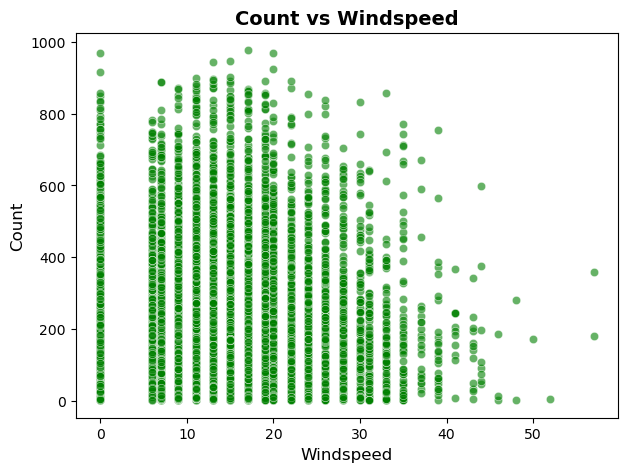

In [216]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='windspeed', y='count', data=df, color='green', alpha=0.6)
plt.title('Count vs Windspeed', fontsize=14, weight='bold')
plt.xlabel('Windspeed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


**Casual vs Count**

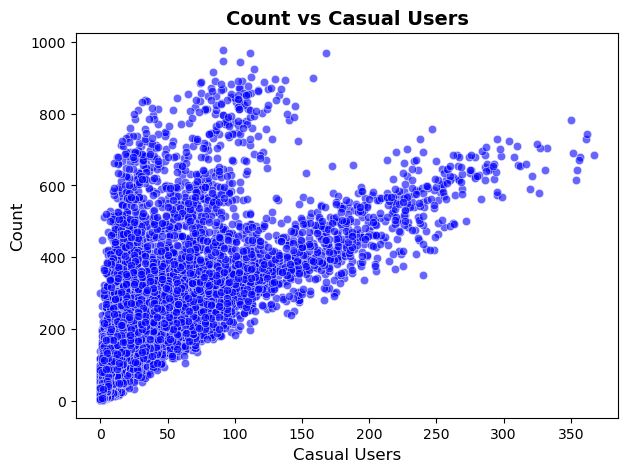

In [217]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='casual', y='count', data=df, color='blue', alpha=0.6)
plt.title('Count vs Casual Users', fontsize=14, weight='bold')
plt.xlabel('Casual Users', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Registered vs Count**

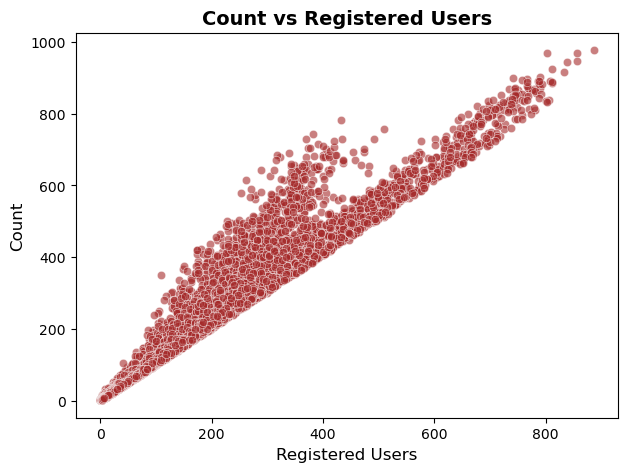

In [218]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='registered', y='count', data=df, color='brown', alpha=0.6)
plt.title('Count vs Registered Users', fontsize=14, weight='bold')
plt.xlabel('Registered Users', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

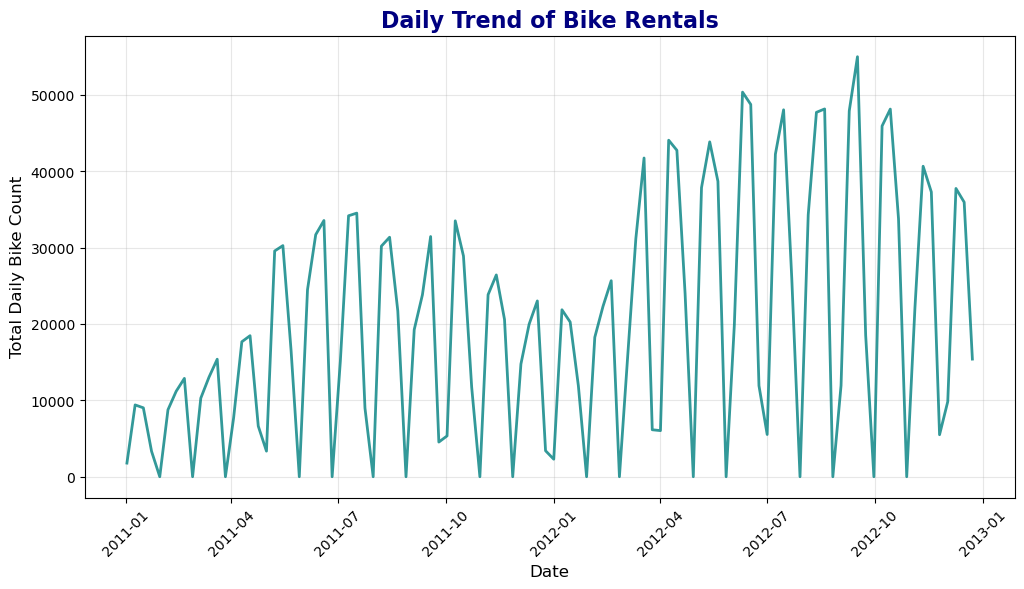

In [219]:
daily_df = df.resample('W', on='datetime').sum(numeric_only=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_df, x=daily_df.index, y="count", color='teal', linewidth=2, alpha=0.8)

plt.title("Daily Trend of Bike Rentals", fontsize=16, weight='bold', color='navy')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Daily Bike Count", fontsize=12)

plt.xticks(rotation=45)
plt.grid(alpha=0.3)

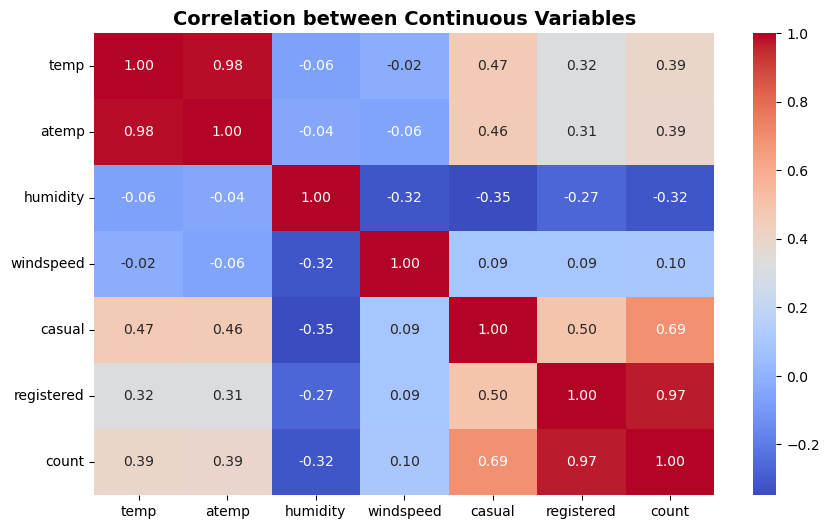

In [220]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['temp','atemp','humidity','windspeed','casual','registered','count']].corr(), 
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Continuous Variables", fontsize=14, weight='bold')
plt.show()



- temp and atemp are very strongly correlated → redundant for modeling.

- count correlates strongly with registered (main user base) and moderately with casual and slightly with temp and atemp.

- Humidity and windspeed have slight negative effects on rentals.

### Multivariate analysis

**Total Count vs. Temperature and Weather**

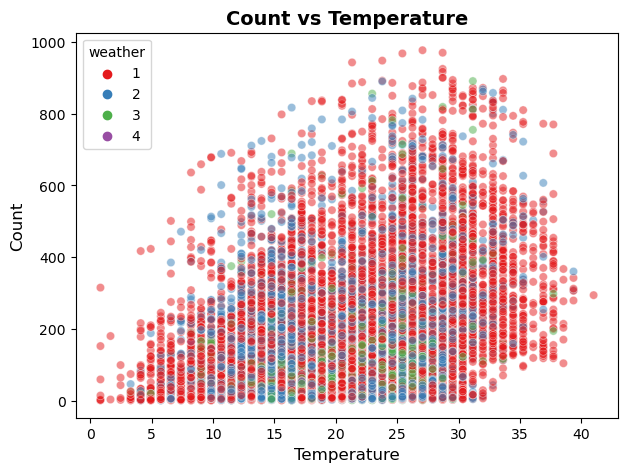

In [221]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='temp', y='count', hue='weather', data=df, alpha=0.5, palette='Set1')
plt.title('Count vs Temperature', fontsize=14, weight='bold')
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


- both a warm temperature and a clear weather condition are necessary for maximum bike rental counts. High temperatures alone may not lead to high counts if the weather is poor (e.g., light rain).

### <font color='purple'>Illustrate the insights based on EDA</font>
#### <font color='purple'>Comments on range of attributes, outliers of various attributes</font>


- temp: temperature range between 0.82 – 41.0 °C, Covers all seasons; indicates full-year data.
- atemp: apparent temperature range from 0.76 – 45.45 °C, Closely follows actual temperature; likely a perceived temperature.
- humidity: humidity range from	0 – 100%	Shows a full range of humidity conditions, from dry to extremely humid.
- windspeed	: windspeed range 0 – 56.996 mph, Some zero values may represent missing windspeed or calm conditions.
- casual: casual range from	0 – 367, 	Highly varied suggests large fluctuations in occasional riders.
- registered: registered range from	0 – 886, Registered users dominate total count, strong pattern of consistent usage.
- count: count range from 1 – 977, Indicates total rides per hour; skewed distribution showing peak hours.

**Outliers of various attributes**

- outliers are detected in casual, registered, count, and occasionally in windspeed because of Peak hours, special events, or favorable weather days.These outliers represent genuine demand peaks, not data errors — so they are retained for business insight.
- High rental outliers signify opportunity periods (weekends, holidays, or good weather) that can guide targeted marketing or fleet allocation.

#### <font color='purple'>Comments on the distribution of the variables and relationship between them</font>

**1. Temperature (temp)**

- Skewness ≈ 0 → The data is almost symmetric.

- Kurtosis = -0.9 → Slightly platykurtic (flatter than normal).

- The temperature values are nearly normally distributed, with most readings around the average. Extreme highs or lows are uncommon.

**2. Apparent Temperature (atemp)**

- Skewness ≈ 0 → Nearly symmetric distribution.

- Kurtosis = -0.85 → Flat distribution, indicating fewer extreme values.

- Apparent temperature remains fairly stable throughout, perceived warmth does not fluctuate drastically.

**3. Humidity**

- Skewness ≈ 0 → Almost perfectly symmetric.

- Kurtosis = -0.76 → Slightly flat, suggesting a wide spread around the mean.

- Humidity levels are evenly distributed, showing no dominance of extremely dry or overly humid days.

**4. Windspeed**

- Skewness = +0.58 → Moderately right-skewed.

- Kurtosis = +0.63 → Slightly leptokurtic (more peaked than normal).

- Most wind speeds are on the lower side, but occasional high winds occur. Calm conditions are more common for bike rentals.

**5. Casual Users (casual)**

- Skewness = +2.5 → Highly right-skewed.

- Kurtosis = +7.55 → Very high, indicating heavy tails.

- Most days have low casual usage, but weekends or special days see sharp spikes — showing sporadic surges in non-regular riders.

**6. Registered Users (registered)**

- Skewness = +1.52 → Moderately right-skewed.

- Kurtosis = +2.63 → More peaked than a normal curve.

- Registered user activity is concentrated around average working days, with a few days showing exceptionally high usage (likely due to work commute peaks).

**7. Total Count (count)**

- Skewness = +1.24 → Positively (right) skewed.

- Kurtosis = +1.30 → Slightly peaked.

- Most of the hourly rental counts are moderate, but there are noticeable peaks during high-demand periods such as evenings, weekends, or favorable weather days.

**8. Season**
- The dataset is well-distributed across all four seasons — Spring (2,686), Summer (2,733), Fall (2,733), and Winter (2,734).

- Very balanced representation ensures no seasonal bias in the analysis.

- Slightly fewer records in Spring, but overall differences are minimal.

- Indicates data coverage for the full year, allowing seasonal pattern detection.

- Summer and Fall are likely high-demand seasons due to favorable weather.

- Increase fleet availability and maintenance support during Summer and Fall to meet higher user demand.

**9. Holiday**
- Non-holidays: 10,575 records (~97% of data).

- Holidays: Only 311 records (~3% of data).

- Dataset is dominated by non-holiday data, showing that daily commuting behavior drives most rentals.

- Rentals may differ during holidays, with more leisure or tourist activity.

- Majority of users ride on regular workdays, indicating commuter-focused usage.

- Design marketing campaigns or discounts targeting holiday and weekend riders to attract more casual users.

**10. Working Day**
- Working days: 7,412 records (~68%).

- Non-working days: 3,474 records (~32%).

- Majority of rentals occur on working days, confirming consistent weekday demand.

- Weekend usage is lower, possibly dominated by casual or recreational riders.

- Bike-sharing primarily serves as a commuting option for office-goers.

- Introduce corporate subscriptions or weekday commuter plans; offer weekend discounts to balance demand.

**11. Weather**
- Clear or few clouds: 7,192 records (~66%).

- Mist or cloudy: 2,834 records (~26%).

- Light rain/snow: 859 records (~8%).

- Heavy rain/snow: Only 1 record (negligible).

- Most rides occur under favorable weather conditions; demand drops sharply in poor weather.

- Weather conditions strongly influence ridership volume.

- Integrate weather forecasts into demand prediction and fleet management systems; prepare for low demand during rain or snow.



#### <font color='purple'>Comments for each univariate and bivariate plots</font>


- Histogram (temp, atemp):	Bell-shaped; balanced temperature distribution.
- Histogram (casual, registered, count): Strong right-skewness, demand spikes on few days.
- Boxplots (season, weather, holiday vs count):	Seasonal and weather variation significant.
- Scatter (temp vs count):	Positive linear trend.
- Scatter (humidity, windspeed vs count): Negative but weak trend.
- Heatmap (correlation): temp & atemp highly correlated (redundant).
- Line/Time Series Plot (count over datetime): Weekly and seasonal cycles evident.

### <font color='purple'>Hypothesis Testing</font>


#### <font color='purple'>2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented</font>


- Null Hypothesis (H₀):There is no significant difference in average bike rentals (count) between working days and non-working days..
- Alternative Hypothesis (H₁): There is a significant difference in average bike rentals between working days and non-working days. 

In [222]:
working = df[df["workingday"] == 1]["count"]
non_working = df[df["workingday"] == 0]["count"]

In [223]:
# Null Hypothesis (H₀): Variance are equal
# Alternative Hypothesis (H₁): variance are not equal

from scipy.stats import levene

stats, p_value = levene(working, non_working)
stats, p_value

if p_value < 0.05:
    print("variance are not equal")
else:
    print("Variance are equal")

Variance are equal


- sampling distribution of the mean is normal and variances are equal , Each observation is independent, So the best choice is **ttest_int**

In [224]:
from scipy.stats import ttest_ind

df.groupby("workingday")["count"].mean()

t, p = ttest_ind(working, non_working, alternative = "two-sided")
t, p

(1.2096277376026694, 0.22644804226361348)

In [225]:
if p< 0.05:
    print("Bike rentals are significantly different between working and non-working days.")
else:
    print("No significant difference in bike rentals between working and non-working days.")

No significant difference in bike rentals between working and non-working days.


#### <font color='purple'>ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season </font>



- Null Hypothesis (H₀):There is no significant difference in average bike rentals (count) across different weather conditions.
- Alternative Hypothesis (H₁): There is at least one weather condition where the average bike rentals (count) are significantly different.

1. **Weather & Count**

In [226]:
clear = df[df["weather"] == 1]["count"]
Mist = df[df["weather"] == 1]["count"]
Light_rain = df[df["weather"] == 1]["count"]
Heavy_rain = df[df["weather"] == 1]["count"]

In [227]:
# Null Hypothesis (H₀): Variance are equal
# Alternative Hypothesis (H₁): variance are not equal

from scipy.stats import levene

stats, p_value = levene(clear, Mist, Light_rain, Heavy_rain)
stats, p_value

if p_value < 0.05:
    print("variance are not equal")
else:
    print("Variance are equal")

Variance are equal


- sampling distribution of the mean is normal,but variances are unequal So the best choice is **Welch’s ANOVA**

In [228]:
import pingouin as pg

welch_anova = pg.welch_anova(dv='count', between='weather', data=df)
print(welch_anova)


    Source  ddof1        ddof2          F         p-unc       np2
0  weather      3  4592.287221  93.932071  5.349498e-59  0.017745


In [229]:
p_value = welch_anova['p-unc'][0]
print("P-value:", p_value)

P-value: 5.34949847782091e-59


In [230]:
if p_value < 0.05:
    print("There is at least one weather condition where the average bike rentals (count) are significantly different.")
else:
    print("There is no significant difference in average bike rentals (count) across different weather conditions")

There is at least one weather condition where the average bike rentals (count) are significantly different.


**np2 (partial eta squared) = 0.0177 → Effect size.**

This is a small effect, 1.77% of variance in bike counts is explained by weather

**2. Season & Count**

- Null Hypothesis (H₀):	There is no significant difference in average bike rentals (count) across the four seasons.
- Alternative Hypothesis (H₁): There is at least one season where the average bike rentals (count) is significantly different.

In [231]:
spring = df[df["season"] == 1]['count']
summer = df[df["season"] == 2]['count']
fall = df[df["season"] == 3]['count']
winter = df[df["season"] == 4]['count']

In [232]:
# Null Hypothesis (H₀): Variance are equal
# Alternative Hypothesis (H₁): variance are not equal

from scipy.stats import levene

stats, p_value = levene(spring, summer, fall, winter)
stats, p_value

if p_value < 0.05:
    print("variance are not equal")
else:
    print("Variance are equal")

variance are not equal


- sampling distribution of the mean is normal,but variances are unequal So the best choice is **Welch’s ANOVA**

In [233]:
import pingouin as pg

welch_anova = pg.welch_anova(dv='count', between='season', data=df)
print(welch_anova)


   Source  ddof1        ddof2          F          p-unc       np2
0  season      3  5945.553571  335.08888  4.844999e-201  0.061317


 Metric     | Meaning                                                          | Value             |
 ---------- | ---------------------------------------------------------------- | ----------------- |
| **Source** | The categorical variable tested                                  | `season`          |
| **ddof1**  | Between-group degrees of freedom                                 | 3                 |
| **ddof2**  | Within-group degrees of freedom (adjusted for unequal variances) | 5945.55           |
| **F**      | Test statistic                                                   | **335.09**        |
| **p-unc**  | p-value                                                          | **4.84 × 10⁻²⁰¹** |
| **np2**    | Partial eta squared (effect size)                                | **0.0613**        |


In [234]:
p_value = welch_anova['p-unc'][0]
print("P-value:", p_value)

P-value: 4.844999392900512e-201


In [235]:
if p_value < 0.05:
    print("There is at least one season where the average bike rentals (count) is significantly different.")
else:
    print("There is no significant difference in average bike rentals (count) across the four seasons.")

There is at least one season where the average bike rentals (count) is significantly different.


**Effect Size (η² = 0.0613):**

- This indicates a moderate effect size.

- In business terms, season accounts for around 6% of the total variation in bike rentals.

#### <font color='purple'>Chi-square test to check if Weather is dependent on the season </font>



- Null Hypothesis (H₀):	there is evidence that weather and season are dependent.
- Alternative Hypothesis (H₁): no evidence of dependence between weather and season.

In [236]:
contingency = pd.crosstab(df["weather"], df["season"])
contingency

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [237]:
from scipy.stats import chi2_contingency

stats, p,dof, expected = chi2_contingency(contingency)
p

1.5499250736864862e-07

In [238]:
if p < 0.05:
    print("there is evidence that weather and season are dependent.")
else:
    print("no evidence of dependence between weather and season.")

there is evidence that weather and season are dependent.


### <font color='purple'>Insights</font>

- The count (target variable) shows a right-skewed distribution, meaning most days have moderate rentals while few have very high counts.

- Temperature has a positive relationship with rentals — as temperature increases, rentals also rise.

- Humidity has a negative effect — higher humidity reduces rentals.

- Windspeed has a slight negative impact — calm weather encourages more rides.

- Season: Rentals are highest in summer and fall, and lowest in winter, indicating strong seasonal trends.

- Holiday: Rentals are generally lower on holidays; most users ride for commuting rather than leisure.

- Working Day: Rentals are significantly higher on working days, showing weekday commuter dominance.

- Weather: Rentals drop sharply in bad weather (rain or snow), showing weather’s strong influence.

**Overall Conclusion**

- Season, working day, and weather are statistically significant factors influencing bike rentals.

- Demand is seasonal and weather-dependent, with strong weekday commuting behavior.

- These insights can guide marketing, operations, and resource allocation for maximizing efficiency and profitability.

### <font color='purple'>Recommendation</font>

- Increase fleet availability during summer and fall, reduce it during winter.

- Schedule maintenance during winter when demand is low.

- Launch promotions and discounts on holidays and weekends to boost usage.

- Integrate weather-based dynamic pricing or availability adjustments.

- Install additional docking stations in high-traffic commuting areas.

- Run eco-friendly commuting campaigns during favorable seasons to encourage consistent ridership.